**Import libraries and modules**

In [89]:
import torchvision
torchvision.__version__

'0.14.1'

In [90]:
import torch
from torch import nn

import matplotlib.pyplot as plt

**Set up device-agnostic code**

In [91]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## **1. Downloading the data**

We will work with a small subset of the Food101 dataset :

Original website : https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/


Also available in `torchvision.datasets.Food101`

**Note :** we will use well formated subset of this dataset from girthub

In [92]:
# Downloading the data from github
import requests
import zipfile
from pathlib import Path

# setup path to data folder
data_path = Path("data/")
image_path = data_path /"pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists.")
else : 
    print(f"Did not fine {image_path} directory, creating one..")
    image_path.mkdir(parents=True,exist_ok=True)
    
    # Dowload the zip file from github
    with open(data_path/"pizza_steak_sushi.zip","wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Doawnloading pizza, steak, sushi data ...")
        f.write(request.content)
        
    # Unzipping the file
    with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
        print("Unzipping pizza, steak, sushi data")
        zip_ref.extractall(image_path)



data\pizza_steak_sushi directory already exists.


## **2. Data Inspection**

Inspect the downloaded folder and its subdirectories and count the files present.

In [93]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [94]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [95]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

1. Get all of the image paths using `pathlib.Path.glob()` to find all of the files ending in `.jpg`.
2. Pick a random image path using Python's `random.choice()`.
3. Get the image class name using `pathlib.Path.parent.stem`.
4. And since we're working with images, we'll open the random image path using `PIL.Image.open()` (PIL stands for Python Image Library).
5. We'll then show the image and print some metadata.

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


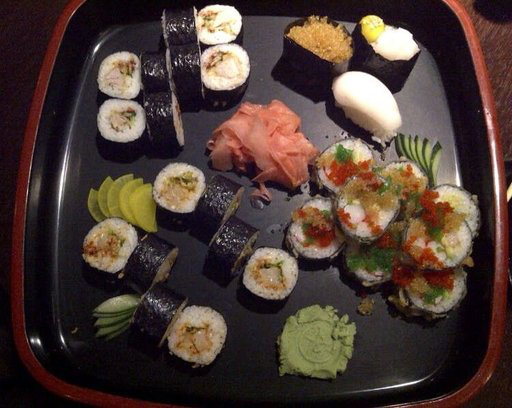

In [96]:
import random
from PIL import Image

# Set random seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")

img


## **3. Transforming the data**

1. Turn it into tensors (numerical representations of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader` for short

#### **Using `torchvision.transforms` for preparing our data**

torchvision.transforms contains many pre-built methods for formatting images, turning them into tensors and even manipulating them for data augmentation 

1. Resize the images using `transforms.Resize()`
2. Flip our images randomly on the horizontal using `transforms.RandomHorizontalFlip()`.
3. Turn our images from a PIL image to a PyTorch tensor using `transforms.ToTensor()`.
4. Compile all transforms using `torchvision.transforms.Compose()`.


In [97]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [98]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64,64)),
    # Flim the images randomly
    transforms.RandomHorizontalFlip(p=0.5), # p : probability
    # Turn image into a tensor
    transforms.ToTensor() # pixel values from 0 to 1   
])

## **4. Option 01 : Loading image data using `ImageFolder`**

Turn data into a dataset :  Only worked because the data was formated in a particular way

In [99]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

print(f"Train data:\n{train_data}\n\nTest data :\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

Test data :
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [100]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [101]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [102]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape : {img.shape}")
print(f"Image data type : {img.dtype}")

Image shape : torch.Size([3, 64, 64])
Image data type : torch.float32


**Plot single image using `Matplotlib`**

Image dimensions are in the format CHW (color channels, height, width) but matplotlib prefers HWC (height, width, color channels).

Original shapetorch.Size([3, 64, 64]) -> Image permute shape torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

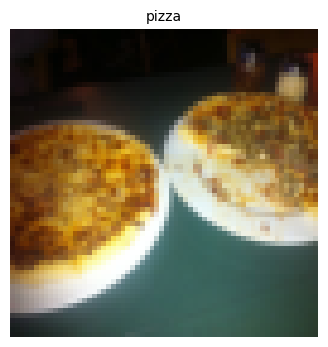

In [103]:
img_permute = img.permute(1,2,0)

print(f"Original shape{img.shape} -> Image permute shape {img_permute.shape}" )

# plot image
plt.figure(figsize=(4,4))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=10)

### **4.1. Turn data into `DataLoaders`**


the higher value num_workers is set to, the more compute power PyTorch will use to load your data.

In [104]:
# Turn train and test data into DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x125248f9bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x125249020a0>)

In [105]:
img, label = next(iter(train_dataloader))

print(f"Imge shape : {img.shape}")
print(f"Label shape : {label.shape}")

Imge shape : torch.Size([1, 3, 64, 64])
Label shape : torch.Size([1])


## **5. Option 02 :Loading Image Data with Custom `Dataset`**

We will replicate the `torchvision.datasets.ImageFolder()`, for that, we will need : 

* Python's `os` for dealing with directories (our data is stored in directories).
* Python's `pathlib` for dealing with `filepaths` (each of our images has a unique filepath).
* `torch` for all things PyTorch.
* PIL's `Image` class for loading images.
* `torch.utils.data.Dataset` to subclass and create our own custom Dataset.
* `torchvision.transforms` to turn our images into tensors.
* Various types from Python's `typing` module to add type hints to our code.

In [106]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [107]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data\pizza_steak_sushi\train
Class names found: ['pizza', 'steak', 'sushi']


In [108]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

### **5.1 Create a custom `Dataset` to replicate `ImageFolder`**

In [109]:
# Inherists from torch.utils.data.Dataset
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    
    # Initialize with targ_dir and transform(optional)
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # Create class attributes
        # Gel all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # Setup transforms
        self.transform = transform
        # Cleate classes and class_to_idx attributs
        self.classes, self.classes_to_idx = find_classes(targ_dir)
        
    # Make function to load images
    def load_image(self, index:int) -> Image.Image:
        "Opens an Image via a path and returns it"
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # Overwite the __len__() method
    def __len__(self)-> int:
        "Returns the total number of samples"
        return len(self.paths)
    
    # Owerwite the __getitem__() method
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (W,y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name  #expects path in data_folder/class_name/image.jpeg
        class_idx  = self.classes_to_idx[class_name]
        
        #return data, label (X, y)
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx        

In [110]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor
])

In [111]:
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x12524bdc430>,
 <__main__.ImageFolderCustom at 0x12524bdc2b0>)

In [112]:
len(train_data_custom) , len(test_data_custom)
print(f"Number of train sample : {len(train_data_custom)}\nNumber of test samples : {len(test_data_custom)}")

Number of train sample : 225
Number of test samples : 75


In [113]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [114]:
train_data_custom.classes_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

#### **Visualizing random samples**

In [115]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

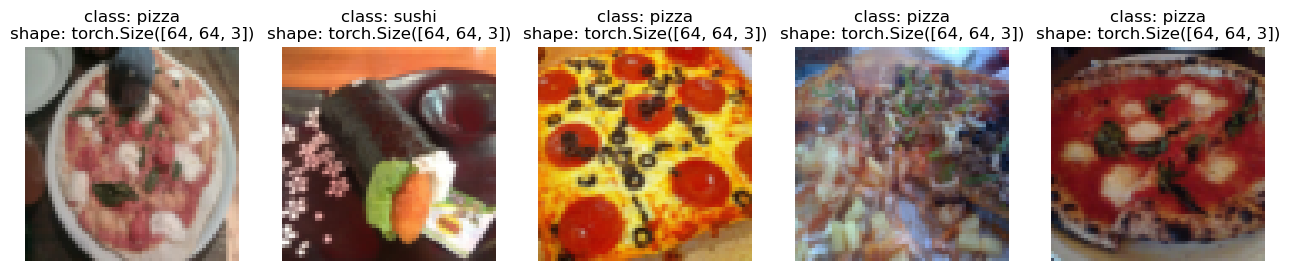

In [116]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom, 
                      n=5, 
                      classes=class_names,
                      seed=None)

#### **5.2 Turn custom loaded dataset into DataLoader**

1. Raw images -> `Dataset` using `ImageFolderCustom`
2. Must urn `Dataset` into `DataLoader` using `torch.utils.data.DataLoader`

In [117]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size = 1,
                                     num_workers=0,
                                     shuffle=True
                                    )
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                   batch_size=1,
                                   num_workers=0,
                                   shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x12524b12eb0>,
 <torch.utils.data.dataloader.DataLoader at 0x12524b12fa0>)

### **6. Create a TinyVGG model**

**6.1 Creating transforms and loading data for Model**

In [118]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

1. Load the data, turning each of our training and test folders first into a Dataset with torchvision.datasets.ImageFolder()
2. Then into a DataLoader using torch.utils.data.DataLoader().
    * We'll set the batch_size=32 and num_workers to as many CPUs on our machine (this will depend on what machine you're using).

In [119]:
# Load and transform dataset
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform)

# Setup hyperparameters
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader with batch size {BATCH_SIZE} AND {NUM_WORKERS} num_workers")

# Create DataLoader
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)

train_dataloader_simple, test_dataloader_simple


Creating DataLoader with batch size 32 AND 8 num_workers


(<torch.utils.data.dataloader.DataLoader at 0x125246217c0>,
 <torch.utils.data.dataloader.DataLoader at 0x12524612760>)

**TinyVGG**

In [120]:
class TinyVGG(nn.Module):
    
    def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
        
    def forward(self, x:torch.Tensor):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x
    
    

In [121]:
torch.manual_seed(42)
model = TinyVGG(input_shape=3,
               hidden_units=10,
               output_shape=len(train_data.classes)).to(device)
model

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

#### Use `torchinfo` to get an idea of the shapes going through our model

In [122]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

###  **7. Train the model**

#### **7.1 Create train & test loop functions**

Specifically, we're going to make three functions:

1. train_step() - takes in a model, a DataLoader, a loss function and an optimizer and trains the model on the DataLoader.
2. test_step() - takes in a model, a DataLoader and a loss function and evaluates the model on the DataLoader.
3. train() - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

In [123]:
def train_step(model:nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               optimizer : torch.optim.Optimizer):
    
    #Put model in train mode
    model.train()
    
    # Setup train loss and accuracy values
    train_loss, train_acc = 0,0
    
    # Loop through data loader data batches
    for batch, (X,y) in enumerate(dataloader):
        # Send data to the device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. loss backwars
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Calculate the accumulate accuracy metrix across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc += (y_pred_class ==1).sum().item()/len(y_pred)
        
    # Ajust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
    

In [124]:
def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    
    # Put model in eval mode
    model.eval()
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0,0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through dataLoader batches
        for batch, (X,y)in enumerate(dataloader):
            # Send data to device
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred_logits = model(X)
            # 2. Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjusting metrics to ger average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc
            
    

#### **7.2 Creating a train() function to combine train_step() and test_step()**

In [125]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps

def train(model: nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
          optimizer : torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5
         ):
    
    # Crate an empty resultes dictionary
    results = {"train_loss" :[],
               "train_acc" : [],
               "test_loss" : [],
               "test_acc" : []
              }
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
        # print out what's happenin': 
        print(
             f"Epoch: {epoch+1} | "
             f"train_loss: {train_loss:.4f} |"
             f"train_acc: {train_acc:.4f} |"
             f"test_loss: {test_loss:.4f} |"
             f"test_acc : {test_acc:.4f} |"
        )
        
        # Update results dictionnary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

#### **7.3 Train and Evaluate Model**

In [126]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

model = TinyVGG(input_shape =3,
                hidden_units=10,
                output_shape= len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                                 lr=0.001)

# Start timer
from timeit import default_timer as timer
start_time = timer()

# Train model

model_results = train(model=model,
              train_dataloader = train_dataloader_simple,
              test_dataloader = test_dataloader_simple,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()

print(f"Total Train time:  {end_time-start_time:.3f} secondes")


 20%|██        | 1/5 [00:17<01:10, 17.55s/it]

Epoch: 1 | train_loss: 1.1077 |train_acc: 0.0391 |test_loss: 1.1375 |test_acc : 0.2604 |


 40%|████      | 2/5 [00:33<00:49, 16.60s/it]

Epoch: 2 | train_loss: 1.0829 |train_acc: 0.8750 |test_loss: 1.1669 |test_acc : 0.1979 |


 60%|██████    | 3/5 [00:49<00:32, 16.28s/it]

Epoch: 3 | train_loss: 1.1212 |train_acc: 1.0000 |test_loss: 1.1731 |test_acc : 0.1979 |


 80%|████████  | 4/5 [01:05<00:16, 16.13s/it]

Epoch: 4 | train_loss: 1.0957 |train_acc: 1.0000 |test_loss: 1.1407 |test_acc : 0.1979 |


100%|██████████| 5/5 [01:21<00:00, 16.27s/it]

Epoch: 5 | train_loss: 1.0928 |train_acc: 1.0000 |test_loss: 1.1459 |test_acc : 0.2292 |
Total Train time:  81.344 secondes


#### **7.3 Plot the loss curves of Model**

In [127]:
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [128]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

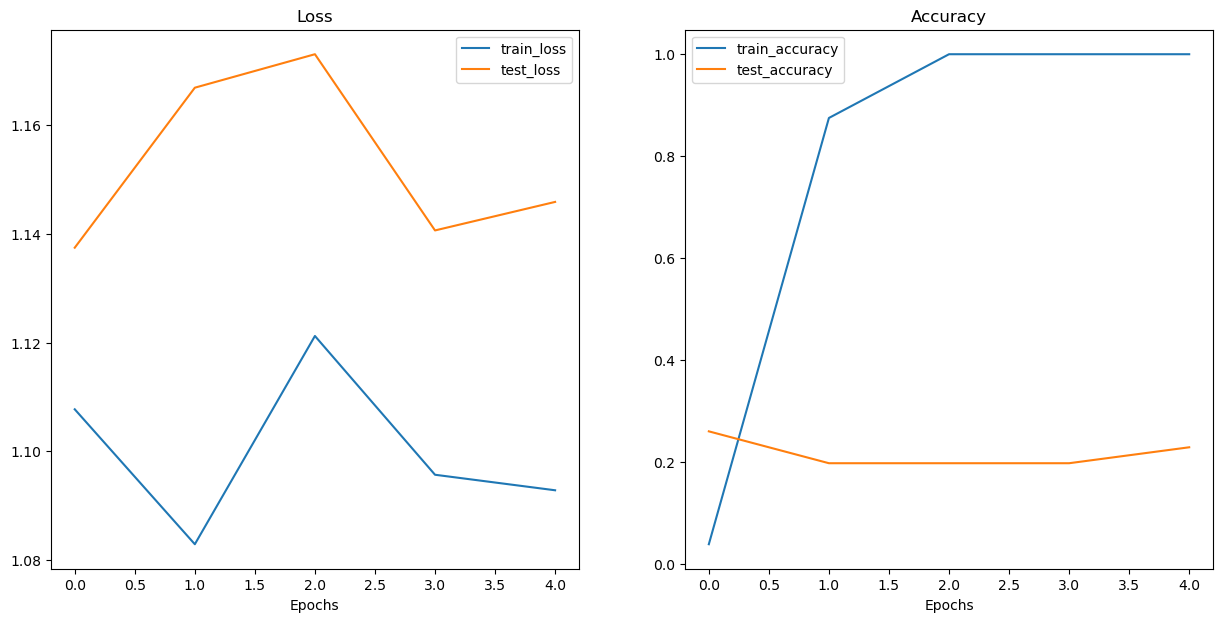

In [129]:
plot_loss_curves(model_results)

In [130]:
import pandas as pd
model_df = pd.DataFrame(model_results)
model_df

,train_loss,train_acc,test_loss,test_acc
0,1.107721,0.039062,1.137472,0.260417
1,1.082881,0.875000,1.166929,0.197917
2,1.121219,1.000000,1.173092,0.197917
3,1.095670,1.000000,1.140651,0.197917
4,1.092813,1.000000,1.145901,0.229167


### **8. Make a prediction on a custom image**

In [131]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data\04-pizza-dad.jpeg already exists, skipping download.


#### 8.1 Loading in a custom image with PyTorch

In [132]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
#print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dtype: torch.uint8


In [133]:
# Try to make a prediction on image in uint8 format (this will error)

"""
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))
    
RuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same

"""

'\nmodel_1.eval()\nwith torch.inference_mode():\n    model_1(custom_image_uint8.to(device))\n    \nRuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same\n\n'

In [134]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

#### **8.2 Predicting on custom images with a trained PyTorch model**

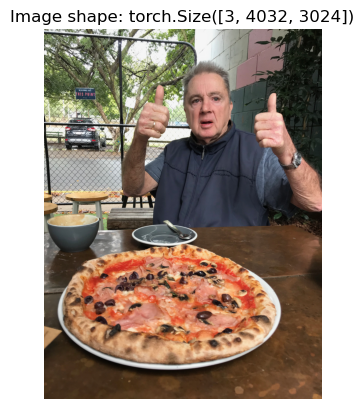

In [135]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [136]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [137]:

"""
model.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)
    
RuntimeError: Expected all tensors to be on the same device, but found at least two devices, 
cpu and cuda:0! (when checking argument for argument weight in method wrapper___slow_conv2d_forward)
  
"""    

'\nmodel.eval()\nwith torch.inference_mode():\n    custom_image_pred = model_1(custom_image_transformed)\n    \nRuntimeError: Expected all tensors to be on the same device, but found at least two devices, \ncpu and cuda:0! (when checking argument for argument weight in method wrapper___slow_conv2d_forward)\n  \n'

Let's fix that by putting our custom_image_transformed on the target device

In [138]:
"""
model.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))
    
RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)
    
"""    

'\nmodel.eval()\nwith torch.inference_mode():\n    custom_image_pred = model_1(custom_image_transformed.to(device))\n    \nRuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)\n    \n'

We can add a batch size dimension using torch.unsqueeze(dim=0) to add an extra dimension our image and finally make a prediction.

In [139]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [140]:
custom_image_pred

tensor([[ 0.0430,  0.0640, -0.1577]])

In [141]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.0430,  0.0640, -0.1577]])
Prediction probabilities: tensor([[0.3522, 0.3597, 0.2881]])
Prediction label: tensor([1])


In [142]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'steak'